_____
# **LOGISTIC REGRESSION**
________

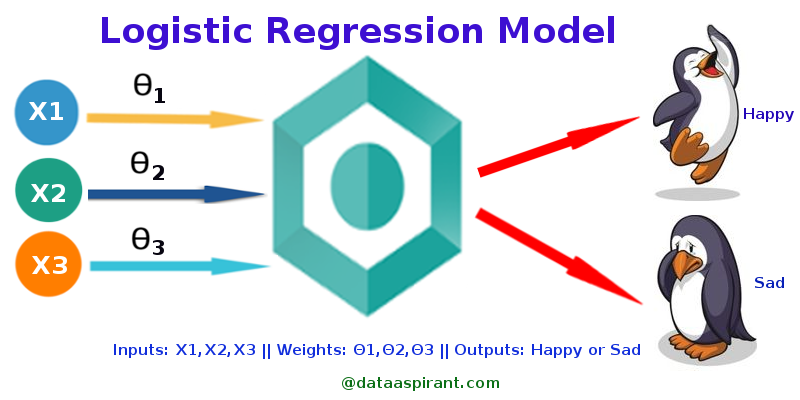

Logistic regression is a supervised machine learning algorithm used for binary classification, that means predicting one of two possible outcomes, like;

- Spam or not spam
- Admitted or not admitted
- Yes or no

In actuality, it is a classification method rather than a regression technique, despite the name.  It calculates the likelihood that a specific input is a member of a particular class.

The concepts of linear regression are further developed upon by logistic regression, which handles classification in a distinct manner. 

### The Linear combination of Logitic Regression

It begins by computing a weighted sum of input features:

z=w 
0
​
 +w 
1
​
 x 
1
​
 +w 
2
​
 x 
2
​
 +⋯+w 
n
​
 x 
n
​
 =w 
⊤
 x

Where:

- 𝑥
 = input features (exam scores, for example)

- 𝑤
 = weights (parameters the model learns) 

- 𝑧
 = raw prediction (called the logit)



### Sigmoid Function 

This is the core of logistic regression. The output 
𝑧
 is then passed through the sigmoid function, which squashes any real number into a value between 0 and 1:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
​

​
Which gives us a probability that the input belongs to the "positive" class.

### Thresholding

In logistic regression classification is done using threshold. Like this:

- If 
𝜎
(
𝑧
)
≥
0.5
σ(z)≥0.5, classify as 1

- If 
𝜎
(
𝑧
)
<
0.5
σ(z)<0.5, classify as 0


### Loss Function (The Binary Cross-Entropy)

Log loss, also known as binary cross-entropy, is a loss function used in logistic regression to train the model (i.e., determine the optimal weights):


$$
J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

Where:

- \( y^{(i)} \) = true label (0 or 1)
- \( \hat{y}^{(i)} \) = predicted probability \( \sigma(z^{(i)}) \)



## **Task For this Notebook**

- The task for this notebook is to predict whether a student will pass or fail based on various student attributes (such as study time, failures, and other characteristics).

### Required Libraries

The libraries required to achieve the task of this notebook are:

- **pandas** → Load and handle data (e.g., CSV files).
- **matplotlib.pyplot** → Create plots and visualizations.
- **seaborn** → Prettier plots (built on matplotlib).
- **sklearn.linear_model** → Build and train the Logistic Regression model.
- **sklearn.model_selection** → Split data into training and test sets.
- **sklearn.metrics** → Check how well the model performs (e.g., accuracy, confusion matrix).


### Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Load Data



In [13]:
# Data is semi-colon seperated

df = pd.read_csv('student-mat.csv', sep=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Data Types and Columns (Data Exploration)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Data Cleaning

In [15]:
# Number of missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [16]:
# Number of duplicates


duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


### Listing the columns of the data set

The columns in this data set are as follows;

In [17]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Feature Engineering

The Logistic Regression targets (grades 0–20) can be transformed into classification problems (pass/fail) by generating a new binary target feature (pass) from the G3 score.

In [18]:
df['pass'] = df['G3'].apply(lambda grade: 1 if grade >= 10 else 0)

### Data Preprocessing

All of the DataFrame's category (object type) columns are identified by this code.

Each of those columns is then transformed into a numeric label using LabelEncoder so that machine learning models can use them.

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### Feature Selection

In [20]:
X = df.drop(columns=['G3', 'pass'])  # Drop the final grade and target
y = df['pass']                      

### Split Data



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train Model


In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predictions

In [24]:
y_pred = model.predict(X_test)

### Evaluate Model

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.98      0.94      0.96        52

    accuracy                           0.95        79
   macro avg       0.94      0.95      0.94        79
weighted avg       0.95      0.95      0.95        79



Here are some key take aways from this output:


- **Class 0: Failure**

   - Predicting "fail" is 90% accurate, according to the model's precision.

   - Recall (96%): 96% of all failed pupils are accurately identified.

   - The F1-score (93%) strikes a balance between recall and precision.

- **Class 1: Pass**

   - Precision (98%): It is 98% accurate when it gives the "pass" prediction.

   - Recall (94%): 94% of real passing pupils are captured.

   - For passing students, the F1-score (96%) indicates an excellent overall classification.


Both the pass and fail classes show excellent performance from the model.

 It's still quite good at spotting failures, but it's a little better at acknowledging passing students (greater precision).   

### Confusion Matix of Model Predictions

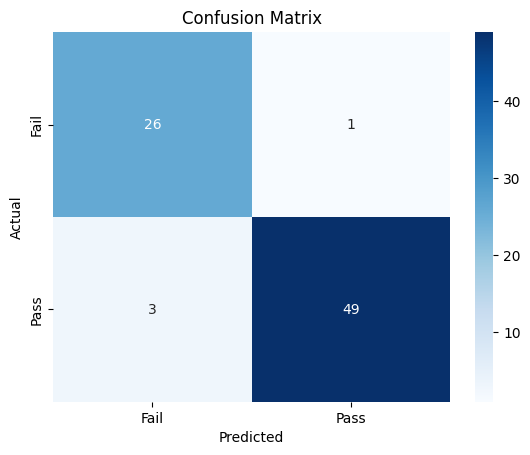

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Key Observations from Confusion Matrix**

- There are only four total misclassifications, indicating that the model is highly accurate.

 - Compared to the False Positive rate of one instance, the False Negative rate of three cases is marginally greater.  This implies that the model may be a bit too conservative in forecasting success because it occasionally incorrectly labels students who ought to pass as failing.

 - Given the high True Positive and True Negative rates, the model does a good job at differentiating between the two groups.

 The matrix's color intensity emphasizes even more how accurate predictions outnumber incorrect ones.

## **Conclusion of Notebook**

We successfully constructed a logistic regression model in this notebook to forecast a student's success or failure based on a variety of academic and personal characteristics from the UCI Student Performance dataset. The things that were achived;



- In order to carry out **data preprocessing**, we converted the final grade into a binary target variable and encoded category features.

- For both pass and fail classes, the logistic regression model produced great **precision and recall** and a high **accuracy of 95%**.

- The findings show that characteristics like study time, prior failures, and family support can be powerful predictors of a student's success.

